In [9]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.linalg import inv
#http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#http://mathworld.wolfram.com/LeastSquaresFitting.html

In [10]:
skin = open('spiral.points.txt','r')
rl = skin.readlines()
#print(rl)

w = []
count = [0,0]
for e in rl:
    if(e.find('\n') != -1):
        e = e[:-1]
    a = e.split('\t')
    a = [float(i) for i in a]
    w.append(a)

skin.close()

x_points = [e[0] for e in w]
y_points = [e[1] for e in w]
x_points = np.array(x_points)
y = np.array(y_points)
y.shape = (y.size,1)

In [11]:
alldata = np.loadtxt('spiral.points.txt')
alldata.shape
x_points = alldata[:,0]
y_points = alldata[:,1]
y = y_points

In [12]:
#print(y,x_points)

In [13]:
def minimized_rss(x,y):
    x_ps = inv(np.dot(x.T,x))
    x_psinv = np.dot(x_ps,x.T)
    w = np.dot(x_psinv,y)
    #print(w)
    return w
def fill_poly(x_points,k=1):
    x= []
    for xp in x_points:
        each =[]
        for i in range(k+1):
            each.append(xp**i)
        x.append(each)
    x = np.array(x).astype(np.float64)
    #print(x)
    return x

def Er(y_h,y_points):
    a = 0.5 * np.sum((y_h - y_points )**2 )
    #print(a)
    return a
def rms(y_h,y_points):
    return np.sqrt(2*Er(y_h,y_points) / len(y_points))

In [18]:
mini = 65
rmses = []
for r in range(1000):
    k = r #Best K-th order model
    x = fill_poly(x_points,k)

    w = minimized_rss(x,y)
    #print('Weights\n' , w)

    y_h = np.dot(w,x.T)
    rmses.append(rms(y_h,y_points))
    if(rmses[-1]<mini):
        mini = rmses[-1]
        best_r = r
print('RMS: ', rms(y_h,y_points))
print('Best RMS: ', mini)
print('Best Degree:', best_r)

RMS:  62.2785809063
Best RMS:  0.409716428575
Best Degree: 65


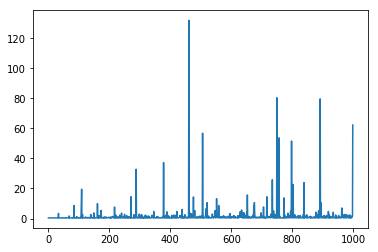

In [19]:
plt.plot(range(len(rmses)),rmses)
plt.show()

In [42]:
x = fill_poly(x_points,best_r)
#x = fill_poly(x_points,1200) #actually goes up and down

w = minimized_rss(x,y)
#print('Weights\n' , w)

y_h = np.dot(w,x.T)
#print(w)

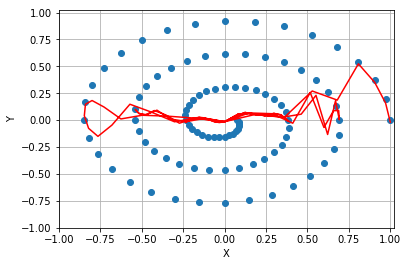

In [47]:
P = alldata
plt.plot(x_points, y_points, 'o')
plt.plot(x_points,y_h,'r', ms=10.01)
plt.grid()
plt.ylim(-1,1.02)
plt.xlim(-1,1.02)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()